In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/data

/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/data


In [109]:
# 데이터 전처리
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 타이타닉 생존 여부

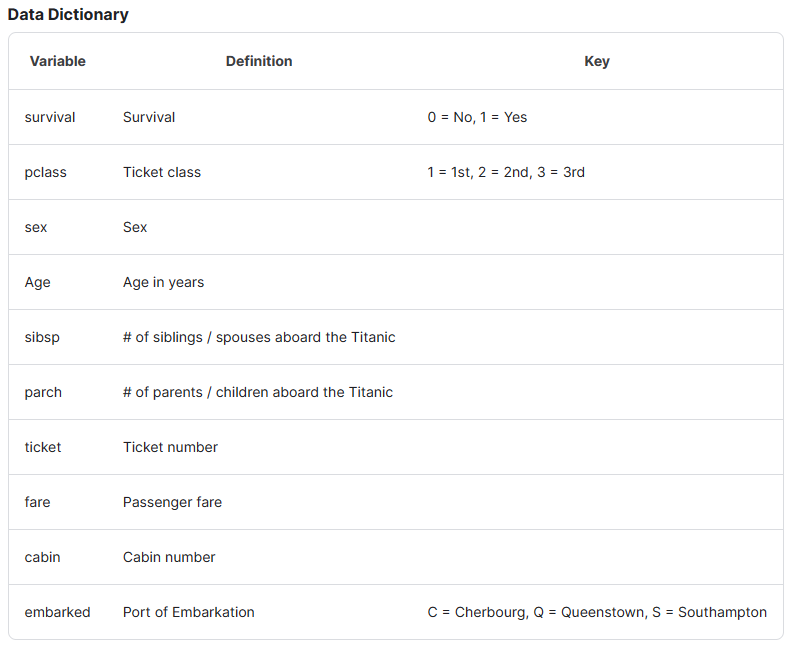

## EDA

In [152]:
train_df = pd.read_csv('train.csv', index_col = 'PassengerId')

In [153]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [154]:
print(train_df.shape)

(891, 11)


In [155]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [157]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## 데이터 전처리

In [160]:
# Ticket : 각각의 데이터마다 다른 범주
# Name : 각각의 데이터마다 다른 범주
# Cabin : 결측치 다수

train_df = train_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [161]:
# Age : 결측치 평균으로 대체

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [163]:
# Embarked : 결측치 최빈값으로 대체
# Embarked : 정박한 항구

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [164]:
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [165]:
# 데이터 라벨링
# Sex : male = 1, female = 0
# Embarked : S = 2, C = 0, Q = 1

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

In [166]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [167]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,1,27.000000,0,0,13.00,2
888,1,1,0,19.000000,0,0,30.00,2
889,0,3,0,29.699118,1,2,23.45,2
890,1,1,1,26.000000,0,0,30.00,0
891,0,3,1,32.000000,0,0,7.75,1


## 데이터 분석

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [250]:
X = train_df.iloc[:,1:]
y = train_df['Survived']

print("X 데이터 : ", X.shape)
print("y 데이터 : ", y.shape)

X 데이터 :  (891, 7)
y 데이터 :  (891,)


In [251]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.000000,1,0,7.2500,2
2,1,0,38.000000,1,0,71.2833,0
3,3,0,26.000000,0,0,7.9250,2
4,1,0,35.000000,1,0,53.1000,2
5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000,2
888,1,0,19.000000,0,0,30.0000,2
889,3,0,29.699118,1,2,23.4500,2


In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

### 로지스틱 회귀분석

In [253]:
lr = LogisticRegression(); lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [254]:
# 로지스틱 회귀분석 정확도

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.8047752808988764
0.8044692737430168


In [255]:
y_test_pred = lr.predict(x_test)

In [256]:
# confusion matrix
train_cm = confusion_matrix(y_test, y_test_pred)
print(train_cm)

[[91 13]
 [22 53]]


In [267]:
# classification_report
test_rpt = classification_report(y_test, y_test_pred)
print(test_rpt)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.80      0.75      0.77        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.81       179



### 랜덤포레스트

In [262]:
rf = RandomForestClassifier(n_estimators=10, random_state = 10) ; rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=10)

In [263]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9705056179775281
0.8156424581005587


In [264]:
y_test_pred = rf.predict(x_test)

In [268]:
# confusion matrix
train_cm = confusion_matrix(y_test, y_test_pred)
print(train_cm)

[[90 14]
 [19 56]]


In [269]:
# classification_report
test_rpt = classification_report(y_test, y_test_pred)
print(test_rpt)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.80      0.75      0.77        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.81       179



## 테스트 데이터의 Survived 예측하기

### 테스트 데이터 전처리

In [270]:
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')

In [271]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [272]:
# Ticket : 각각의 데이터마다 다른 범주
# Name : 각각의 데이터마다 다른 범주
# Cabin : 결측치 다수

test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [273]:
# Age : 결측치 평균으로 대체

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [276]:
# Embarked : 결측치 최빈값으로 대체
# Embarked : 정박한 항구

test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [281]:
# Fare : 결측치 평균으로 대체

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [282]:
# 범주형 변수 라벨링

test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

In [283]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [284]:
x = test_df

In [347]:
y_pred = rf.predict(x)

In [348]:
result = pd.DataFrame(y_pred)
result.columns = [['Survived_pred']]
result

,Survived_pred
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


## 비교

In [349]:
answer = pd.read_csv('gender_submission.csv')

In [350]:
answer = answer.drop(['PassengerId'], axis=1)
answer

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [356]:
res = pd.concat([answer, result], axis = 1, ignore_index = True)
res.columns = ['Survived', 'Survived_pred']

In [357]:
res

,Survived,Survived_pred
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [358]:
res['Equal'] = (res['Survived'] == res['Survived_pred']).astype(int)

In [360]:
(res['Equal'].sum()) / 418

0.7822966507177034